In [1]:
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import os

In [83]:
def get_column(files, model):
    loaded_model = load_model(model)
    column = []
    for item in files:
        df = pd.read_csv(item)
        train_data = df[["wid_x", "wid_y", "wew_x", "wew_y", "seed_x", "seed_y",
           "trkl_x", "trkl_y", "trkl_z", "trkl_px", "trkl_py", "trkl_pz","E/p",
           "h4_41", "h4_42", "h4_43", "h4_44", "h4_45", "h4_46"]].values
        predictions = loaded_model.predict(train_data)
        positive_count = np.sum(predictions > 0.5)
        positive_rate = positive_count / len(predictions)
        column.append(positive_rate)
    return column

In [7]:
EID = "/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/electronID_w_track_95"
MID = "/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/muonID_w_track_99"
PID = "/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/pi+-ID_w_track"
PHID = "/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/photon_ID_w_track"

filenames = ['/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_data/p5_80_pi+_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_data/p5_80_electron_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_data/p5_80_pi-_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_data/p5_80_klong_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_data/p5_80_pi0_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_data/p5_80_muon_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_data/p5_80_positron_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_data/p5_80_photon_0_10000.csv']


In [14]:
loaded_model = load_model("/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/photon_ID_w_track")
df = pd.read_csv('/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_data/p5_80_electron_0_10000.csv')
train_data = df[["wid_x", "wid_y", "wew_x", "wew_y", "seed_x", "seed_y",
   "trkl_x", "trkl_y", "trkl_z", "trkl_px", "trkl_py", "trkl_pz","E/p",
   "h4_41", "h4_42", "h4_43", "h4_44", "h4_45", "h4_46"]].values
predictions = loaded_model.predict(train_data)
positive_count = np.sum(predictions > 0.5)
positive_rate = positive_count / len(predictions)

329/329 [==============================] - 0s 284us/step


In [15]:
positive_rate

0.0

In [16]:
positive_count

0

In [22]:
e_column

[0.033142664872139974,
 0.8458464173565515,
 0.03161830447858246,
 0.0002488181139586962,
 0.020291238959178802,
 9.996001599360256e-05,
 0.841895356566328,
 0.021213284699558455]

In [35]:
m_column

[0.016150740242261104,
 0.0,
 0.049418840933105744,
 0.001492908683752177,
 0.0,
 0.8774490203918432,
 0.0,
 0.0]

In [96]:
ph_column

[0.033142664872139974,
 0.8458464173565515,
 0.03161830447858246,
 0.0002488181139586962,
 0.020291238959178802,
 9.996001599360256e-05,
 0.841895356566328,
 0.021213284699558455]

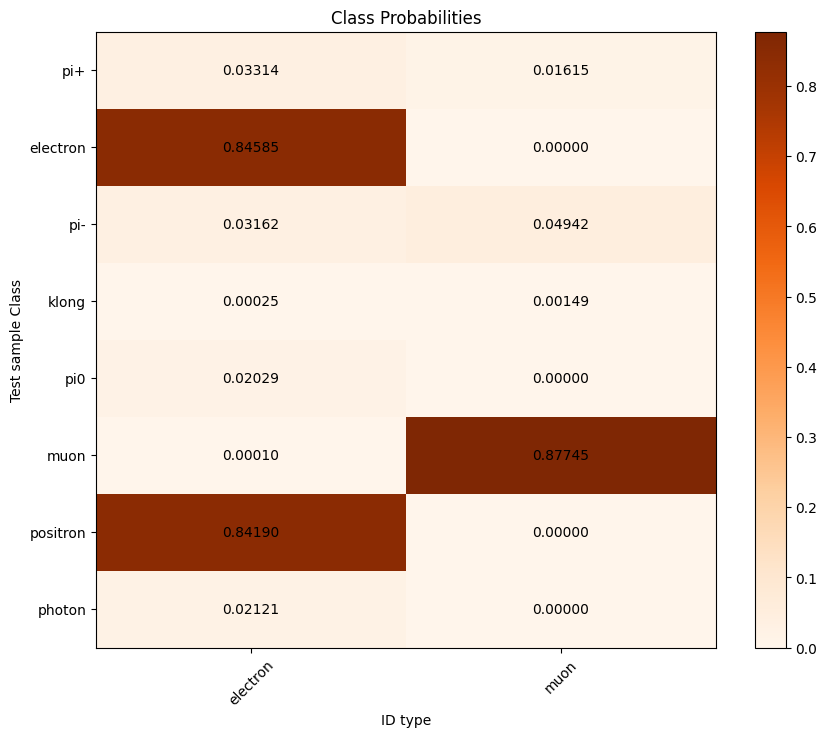

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Your columns
column1 = [0.033142664872139974, 0.8458464173565515, 0.03161830447858246,
           0.0002488181139586962, 0.020291238959178802, 9.996001599360256e-05,
           0.841895356566328, 0.021213284699558455]

column2 = [0.016150740242261104, 0.0, 0.049418840933105744, 0.001492908683752177,
           0.0, 0.8774490203918432, 0.0, 0.0]

# Stack columns to create a 2D array
cm = np.column_stack((column1, column2))

# Class labels for rows
row_labels = ["pi+", "electron", "pi-", "klong", "pi0", "muon", "positron", "photon"]

# Column labels
column_labels = ["electron", "muon"]

# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 8)) # Increase the figure size for clarity
cax = ax.imshow(cm, cmap=plt.cm.Oranges, aspect='auto')

# Add color bar
fig.colorbar(cax)

# Add text annotations.
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f"{val:.5f}", ha='center', va='center', color='black')

# Set ticks and labels
ax.set_xticks(np.arange(len(column_labels)))
ax.set_yticks(np.arange(len(row_labels)))
ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)

# Rotate the tick labels for clarity on the x-axis
plt.xticks(rotation=45)

# Set axis labels
plt.xlabel('ID type')
plt.ylabel('Test sample Class')

plt.title('Class Probabilities')
plt.savefig("2_col_confm.png")
